In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

In [3]:
df = pd.read_csv('BankCustomerData.csv')
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,term_deposit
0,1,58,management,2,tertiary,0,2143,1,0,5,may,261,1,-1,0,0
1,2,44,technician,1,secondary,0,29,1,0,5,may,151,1,-1,0,0
2,3,33,entrepreneur,2,secondary,0,2,1,1,5,may,76,1,-1,0,0
3,4,47,blue-collar,2,unknown,0,1506,1,0,5,may,92,1,-1,0,0
4,5,33,unknown,1,unknown,0,1,0,0,5,may,198,1,-1,0,0


# Phân tích dữ liệu

## Giá trị lớn nhất, nhỏ nhất

In [5]:
numberic_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

min_max_stats = df[numberic_cols].agg(['min', 'max'])
print(min_max_stats)


     age  balance  duration  campaign  pdays  previous
min   18    -8019         0         1     -1         0
max   95   102127      4918        63    536       275


## Giá trị phổ biến nhất, hiếm nhất

In [7]:
columns_of_interest = ['age', 'job', 'marital', 'education', 'education', 'default', 'housing', 'loan', 'day',
                      'month', 'term_deposit']

def most_least_common(df, columns):
    stats = []
    for col in columns:
        value_counts = df[col].value_counts()
        most_common = value_counts.idxmax()
        most_common_count = value_counts.max()
        least_common = value_counts.idxmin()
        least_common_count = value_counts.min()
        stats.append({
            'attribute': col,
            'most_common': most_common,
            'most_common_count': most_common_count,
            'least_common': least_common,
            'least_common_count': least_common_count
        })
    return pd.DataFrame(stats)


stats_df = most_least_common(df, columns_of_interest)
print(stats_df)


       attribute  most_common  most_common_count least_common  \
0            age           32               1999           94   
1            job  blue-collar               9536      unknown   
2        marital            2              25868            0   
3      education    secondary              22066      unknown   
4      education    secondary              22066      unknown   
5        default            0              41828            1   
6        housing            1              24590            0   
7           loan            0              35554            1   
8            day           20               2703            1   
9          month          may              13532          dec   
10  term_deposit            0              38678            1   

    least_common_count  
0                    1  
1                  264  
2                 4965  
3                 1690  
4                 1690  
5                  811  
6                18049  
7                 7

## Giá trị trung bình, trung vị

In [8]:
numberic_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

min_max_stats = df[numberic_cols].agg(['mean', 'median'])
print(min_max_stats)

              age      balance    duration  campaign      pdays  previous
mean    40.788808  1331.863951  255.957504  2.816412  34.169141  0.465442
median  39.000000   429.000000  177.000000  2.000000  -1.000000  0.000000


# Trực quan hóa dữ liệu

### 2.5 So sánh tỉ lệ đăng ký gửi tiền có kì hạn giữa các nhóm khách hàng có khoản vay nhà và có khoản vay cá nhân

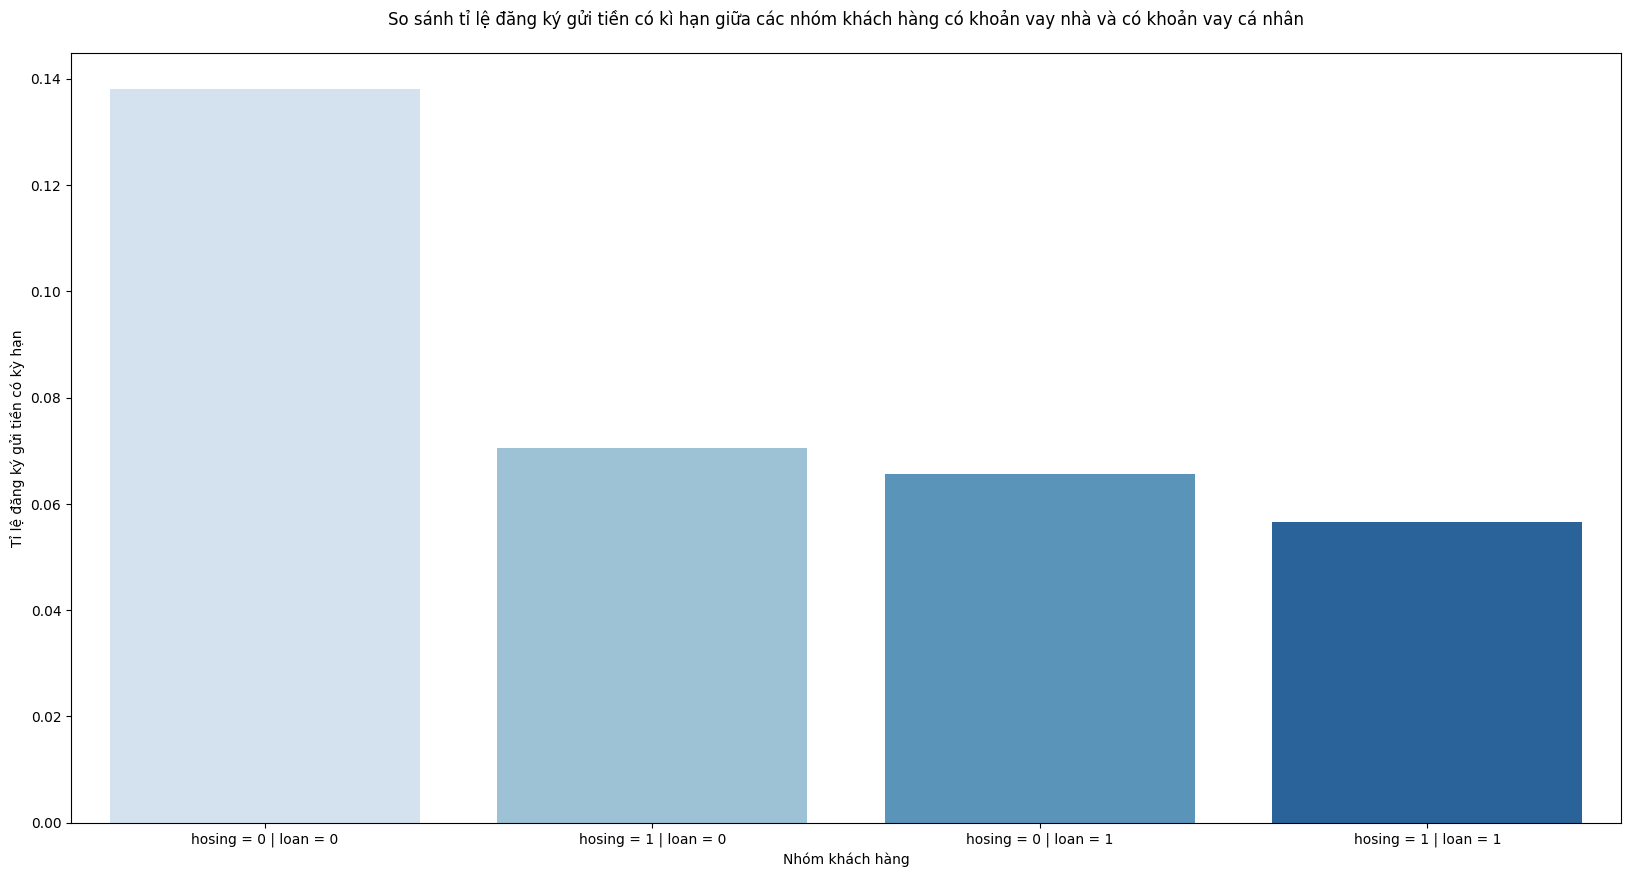

In [121]:
fig = plt.figure(figsize=(20,10))

no_housing_no_loan = df[(df['housing'] == 0) & (df['loan'] == 0)]
have_housing_no_loan = df[(df['housing'] == 1) & (df['loan'] == 0)]
no_housing_have_loan = df[(df['housing'] == 0) & (df['loan'] == 1)]
have_housing_have_loan = df[(df['housing'] == 1) & (df['loan'] == 1)]

labels = ['hosing = 0 | loan = 0',
         'hosing = 1 | loan = 0',
         'hosing = 0 | loan = 1',
         'hosing = 1 | loan = 1',]
percents = [
    (no_housing_no_loan['term_deposit'] == 1).sum() / len(no_housing_no_loan),
    (have_housing_no_loan['term_deposit'] == 1).sum() / len(have_housing_no_loan),
    (no_housing_have_loan['term_deposit'] == 1).sum() / len(no_housing_have_loan),
    (have_housing_have_loan['term_deposit'] == 1).sum() / len(have_housing_have_loan)
]

ax = sns.barplot(x=labels, y=percents, palette='Blues', hue=labels)
ax.set_ylabel('Tỉ lệ đăng ký gửi tiền có kỳ hạn')
ax.set_xlabel('Nhóm khách hàng')
ax.set_title('So sánh tỉ lệ đăng ký gửi tiền có kì hạn giữa các nhóm khách hàng có khoản vay nhà và có khoản vay cá nhân',pad=20);

plt.savefig('2_5.png')

### 2.6 Phân tích tần suất đăng ký gửi tiền có kỳ hạn theo từng tháng trong năm

<Figure size 2000x1000 with 0 Axes>

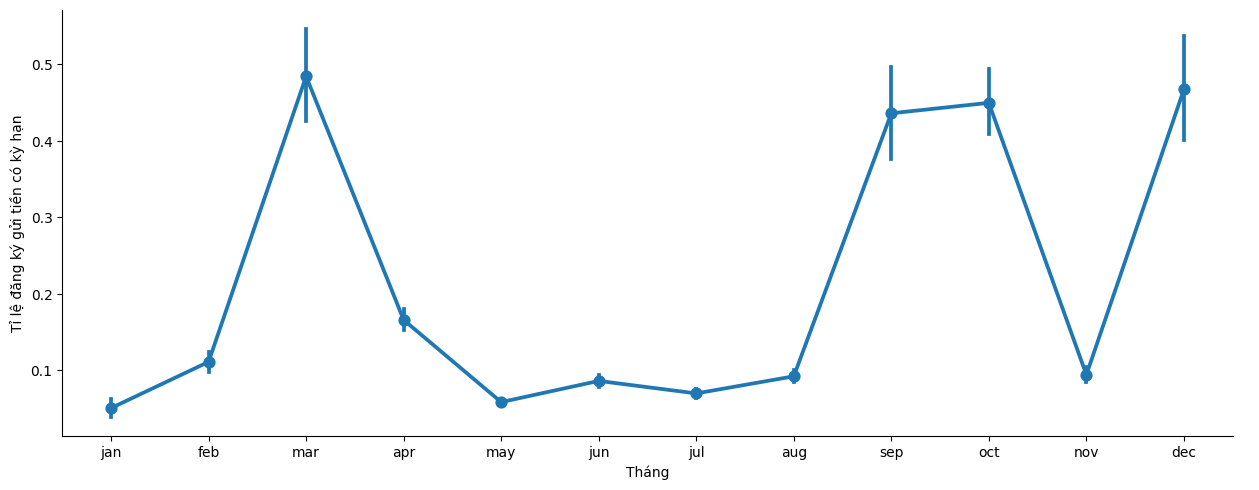

In [122]:
fig = plt.figure(figsize=(20,10))

df['month'] = pd.Categorical(df['month'], categories=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul',
                                                       'aug', 'sep', 'oct', 'nov', 'dec'], 
                             ordered=True)
# ax = sns.barplot(x=df['month'], y=df['term_deposit'], palette='Blues', hue=df['month'])
ax = sns.catplot(x='month',y='term_deposit',data=df, aspect=2.5, kind='point')
ax.set_ylabels('Tỉ lệ đăng ký gửi tiền có kỳ hạn')
ax.set_xlabels('Tháng')

plt.savefig('2_6.png')

# Tiền xử lý dữ liệu

### Bước 1: Làm sạch dữ liệu

In [145]:
# Loại bỏ cột không cần thiết: ID
col_to_drop = ['ID']
df.drop(col_to_drop, axis=1, inplace=True)

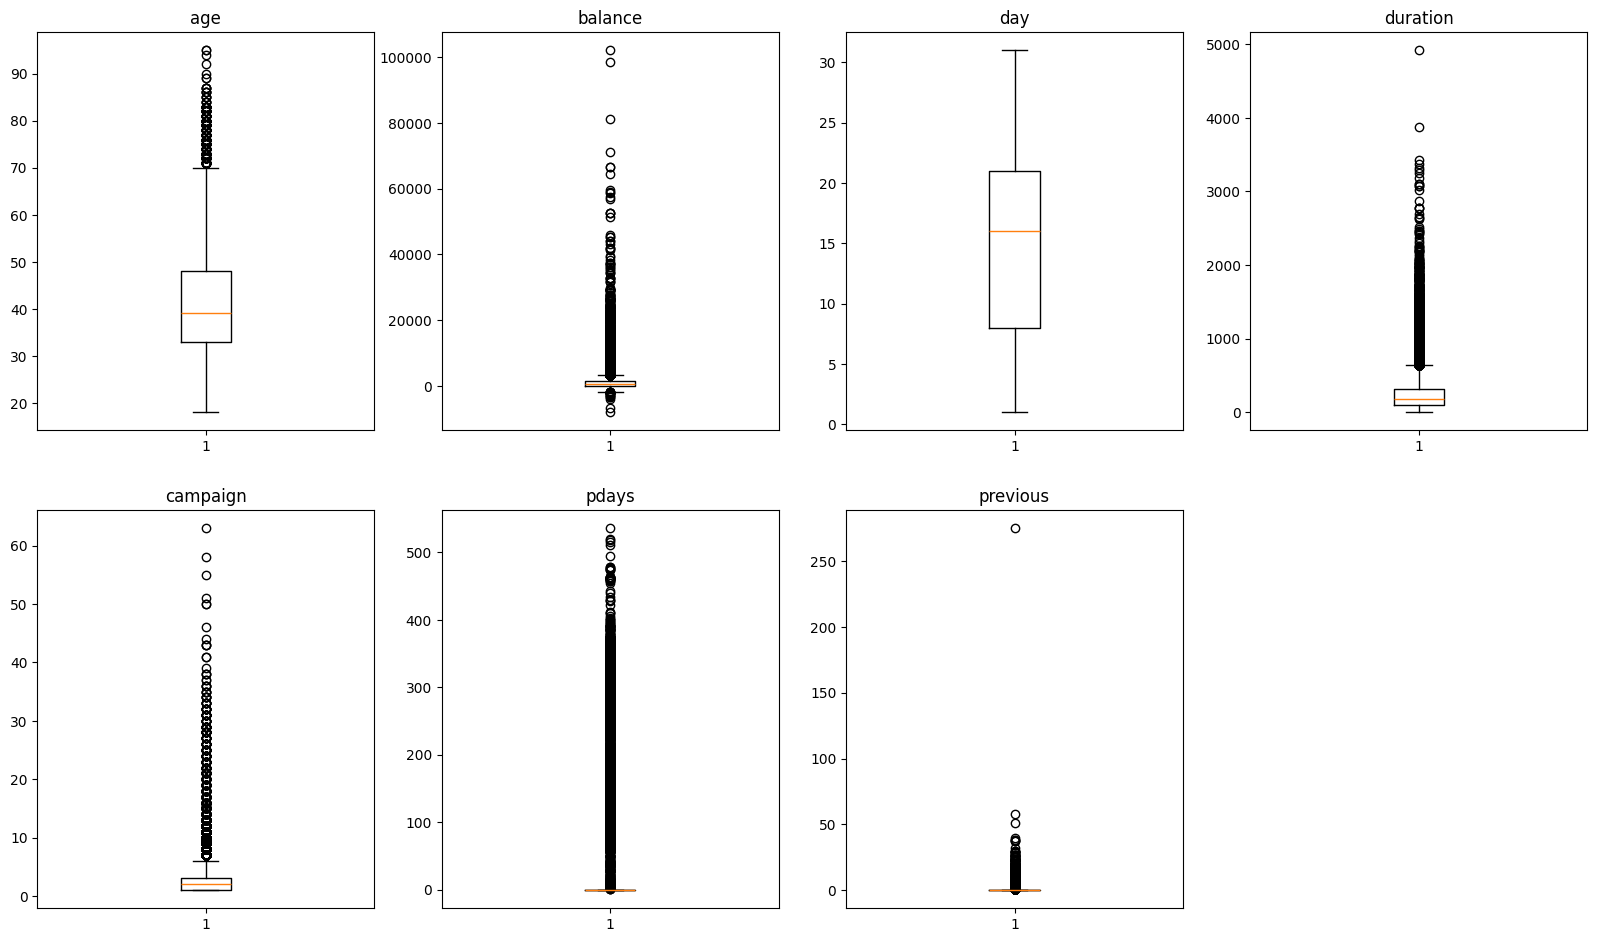

In [146]:
numberic_col = ['age',
                'balance', 
                'day',
                'duration',
                'campaign',
                'pdays',
                'previous',
]

plt.figure(figsize=(20,30))

for i, col in enumerate(numberic_col):
    plt.subplot(5,4,i+1)
    plt.boxplot(df[col], whis=1.5)
    plt.title(col)

In [138]:
# Xác định số lượng và phân trăm các giá trị ngoại lệ 
# Z score
for col in numberic_col:
    mean = df[col].mean()
    std = df[col].std()
    lower = mean - std*3
    upper = mean + std*3

    count_outliers = len(np.where((df[col] < lower) | ( df[col] > upper))[0])
    percent_outlier = round(count_outliers / len(df) * 100, ndigits=2)
    print(f"Cột {col} có {count_outliers} giá trị nhiễu, chiếm {percent_outlier}%")


Cột age có 258 giá trị nhiễu, chiếm 0.61%
Cột balance có 707 giá trị nhiễu, chiếm 1.66%
Cột day có 0 giá trị nhiễu, chiếm 0.0%
Cột duration có 918 giá trị nhiễu, chiếm 2.15%
Cột campaign có 839 giá trị nhiễu, chiếm 1.97%
Cột pdays có 2013 giá trị nhiễu, chiếm 4.72%
Cột previous có 554 giá trị nhiễu, chiếm 1.3%


In [191]:
# Xác định số lượng và phân trăm các giá trị ngoại lệ 
# Box plot
for col in numberic_col:
    q75, q25 = np.percentile(df[col],[75,25])
    iqr = q75 - q25
    
    lower = q25 - (iqr*1.5)
    upper = q75 + (iqr*1.5)

    count_outliers = len(np.where((df[col] < lower) | ( df[col] > upper))[0])
    percent_outlier = round(count_outliers / len(df) * 100, ndigits=2)
    print(f"Cột {col} có {count_outliers} giá trị nhiễu, chiếm {percent_outlier}%")


Cột age có 295 giá trị nhiễu, chiếm 0.69%
Cột balance có 4535 giá trị nhiễu, chiếm 10.64%
Cột day có 0 giá trị nhiễu, chiếm 0.0%
Cột duration có 3127 giá trị nhiễu, chiếm 7.33%
Cột campaign có 3021 giá trị nhiễu, chiếm 7.09%
Cột pdays có 6557 giá trị nhiễu, chiếm 15.38%
Cột previous có 6557 giá trị nhiễu, chiếm 15.38%


In [147]:
from sklearn.base import BaseEstimator, TransformerMixin

class ZscoreOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, z_threshold: float = 3):
        self.z_threshold = z_threshold
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        mean = X.mean()
        std = X.std()
        self.lower = mean - self.z_threshold * std
        self.upper = mean + self.z_threshold * std
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)


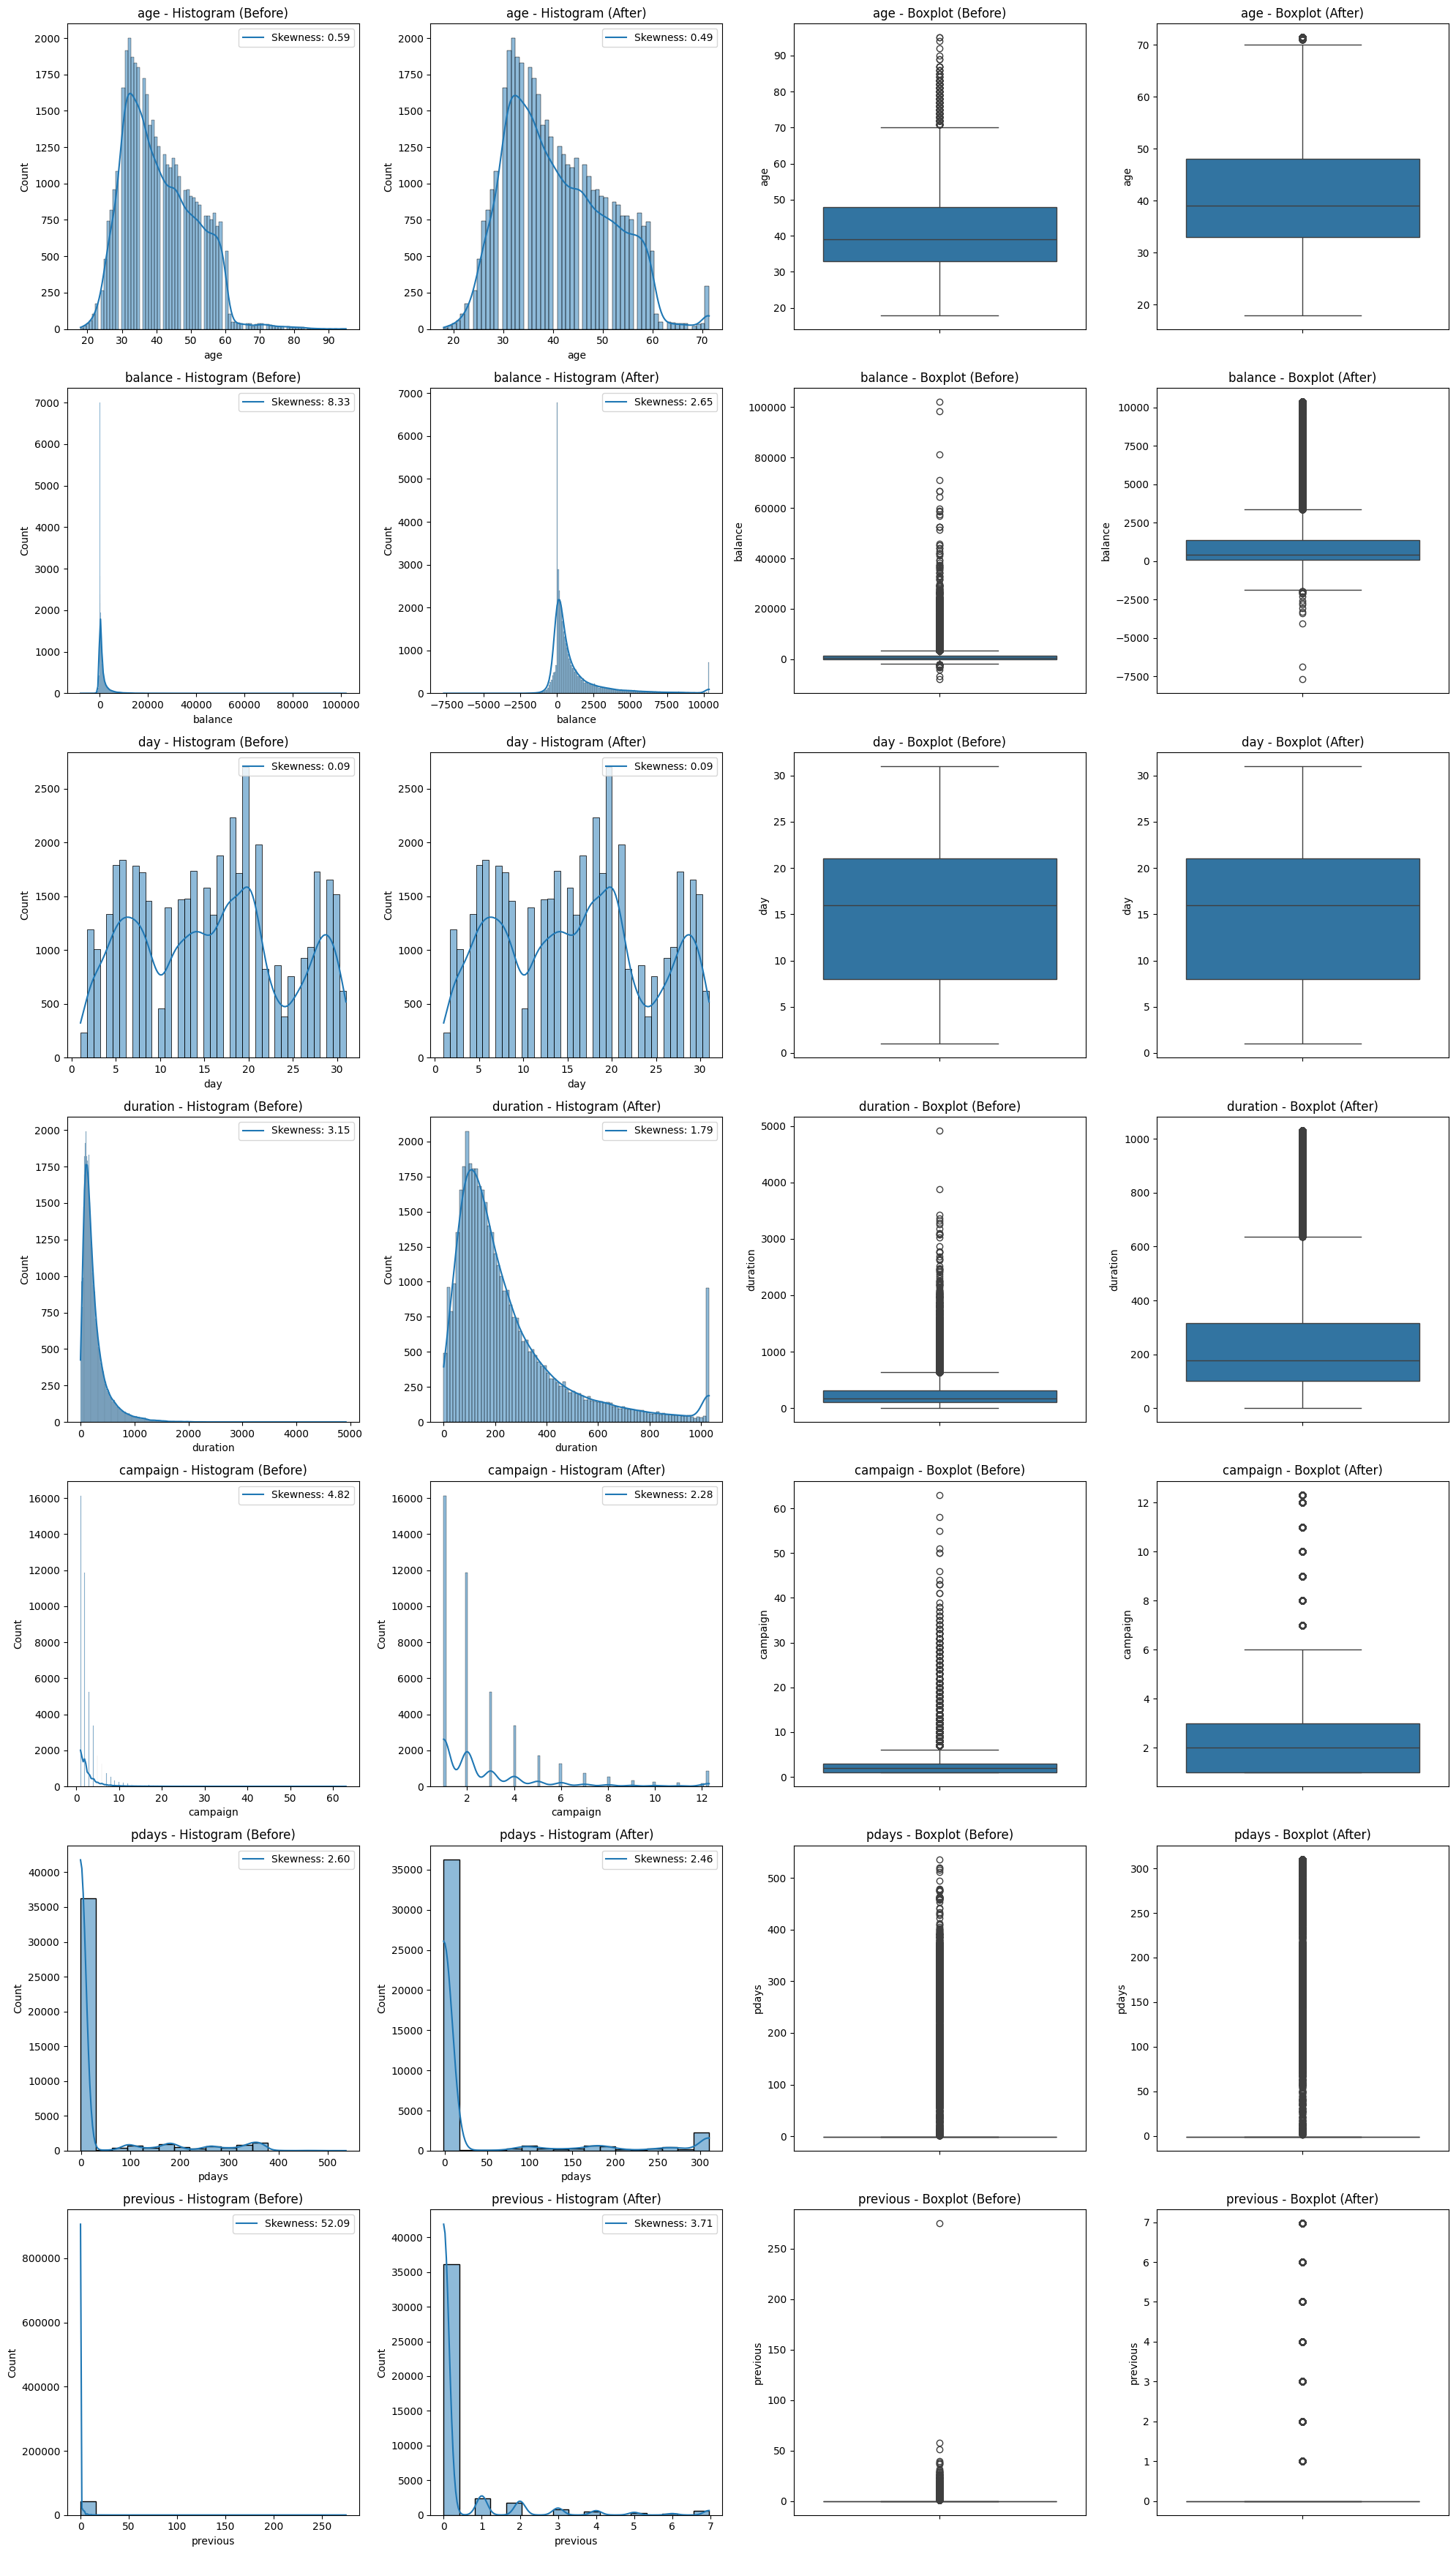

In [140]:
fig, axes = plt.subplots(len(numberic_col), 4, figsize=(20, len(numberic_col) * 5))

for i, col in enumerate(numberic_col):
    # Áp dụng kĩ thuật loại bỏ outliers
    new_col = ZscoreOutlierClipper().fit_transform(df[col])
    
    # Histogram trước
    sns.histplot(df[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'{col} - Histogram (Before)')
    skewness_before = df[col].skew()
    axes[i, 0].legend([f'Skewness: {skewness_before:.2f}'], loc='upper right')

     # Histogram sau
    sns.histplot(new_col, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} - Histogram (After)')
    skewness_after = new_col.skew()
    axes[i, 1].legend([f'Skewness: {skewness_after:.2f}'], loc='upper right')
    
    # Boxplot trước
    sns.boxplot(y=df[col], ax=axes[i, 2])
    axes[i, 2].set_title(f'{col} - Boxplot (Before)')

    # Boxplot sau
    sns.boxplot(y=new_col, ax=axes[i, 3])
    axes[i, 3].set_title(f'{col} - Boxplot (After)')

plt.tight_layout()
plt.savefig('zscore_outlier.png')

In [148]:
# Xử lý giá trị nhiễu 
for i, col in enumerate(numberic_col):
    df[col] = ZscoreOutlierClipper().fit_transform(df[col])


In [149]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,term_deposit
0,58.0,management,2,tertiary,0,2143.0,1,0,5,may,261.0,1.0,-1.0,0.0,0
1,44.0,technician,1,secondary,0,29.0,1,0,5,may,151.0,1.0,-1.0,0.0,0
2,33.0,entrepreneur,2,secondary,0,2.0,1,1,5,may,76.0,1.0,-1.0,0.0,0
3,47.0,blue-collar,2,unknown,0,1506.0,1,0,5,may,92.0,1.0,-1.0,0.0,0
4,33.0,unknown,1,unknown,0,1.0,0,0,5,may,198.0,1.0,-1.0,0.0,0


In [196]:
# Nhận diện dữ liệu bị thiếu
df.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
term_deposit    0
dtype: int64

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           42639 non-null  float64
 1   job           42639 non-null  object 
 2   marital       42639 non-null  int64  
 3   education     42639 non-null  object 
 4   default       42639 non-null  int64  
 5   balance       42639 non-null  float64
 6   housing       42639 non-null  int64  
 7   loan          42639 non-null  int64  
 8   day           42639 non-null  int64  
 9   month         42639 non-null  object 
 10  duration      42639 non-null  float64
 11  campaign      42639 non-null  float64
 12  pdays         42639 non-null  float64
 13  previous      42639 non-null  float64
 14  term_deposit  42639 non-null  int64  
dtypes: float64(6), int64(6), object(3)
memory usage: 4.9+ MB


In [198]:
# Ép kiểu thuộc tính của dữ liệu
df['campaign'] = df['campaign'].astype('int64')
df['pdays'] = df['pdays'].astype('int64')
df['previous'] = df['previous'].astype('int64')
df['age'] = df['age'].astype('int64')


In [71]:
# Kiểm tra giá trị trùng
df.duplicated().any()

False

In [150]:
df['job'].value_counts()

job
blue-collar      9536
management       8851
technician       7223
admin.           4810
services         4033
retired          1880
self-employed    1500
entrepreneur     1453
unemployed       1193
housemaid        1178
student           718
unknown           264
Name: count, dtype: int64

In [152]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Xử lý ý nghĩa của dữ liệu

## Dữ liệu dạng danh mục không có thứ bậc - job
le = preprocessing.LabelEncoder()
df['job'] = le.fit_transform(df['job'])
df['job'].value_counts()

job
1     9536
4     8851
9     7223
0     4810
7     4033
5     1880
6     1500
2     1453
10    1193
3     1178
8      718
11     264
Name: count, dtype: int64

education
secondary    22066
tertiary     12302
primary       6581
unknown       1690
Name: count, dtype: int64


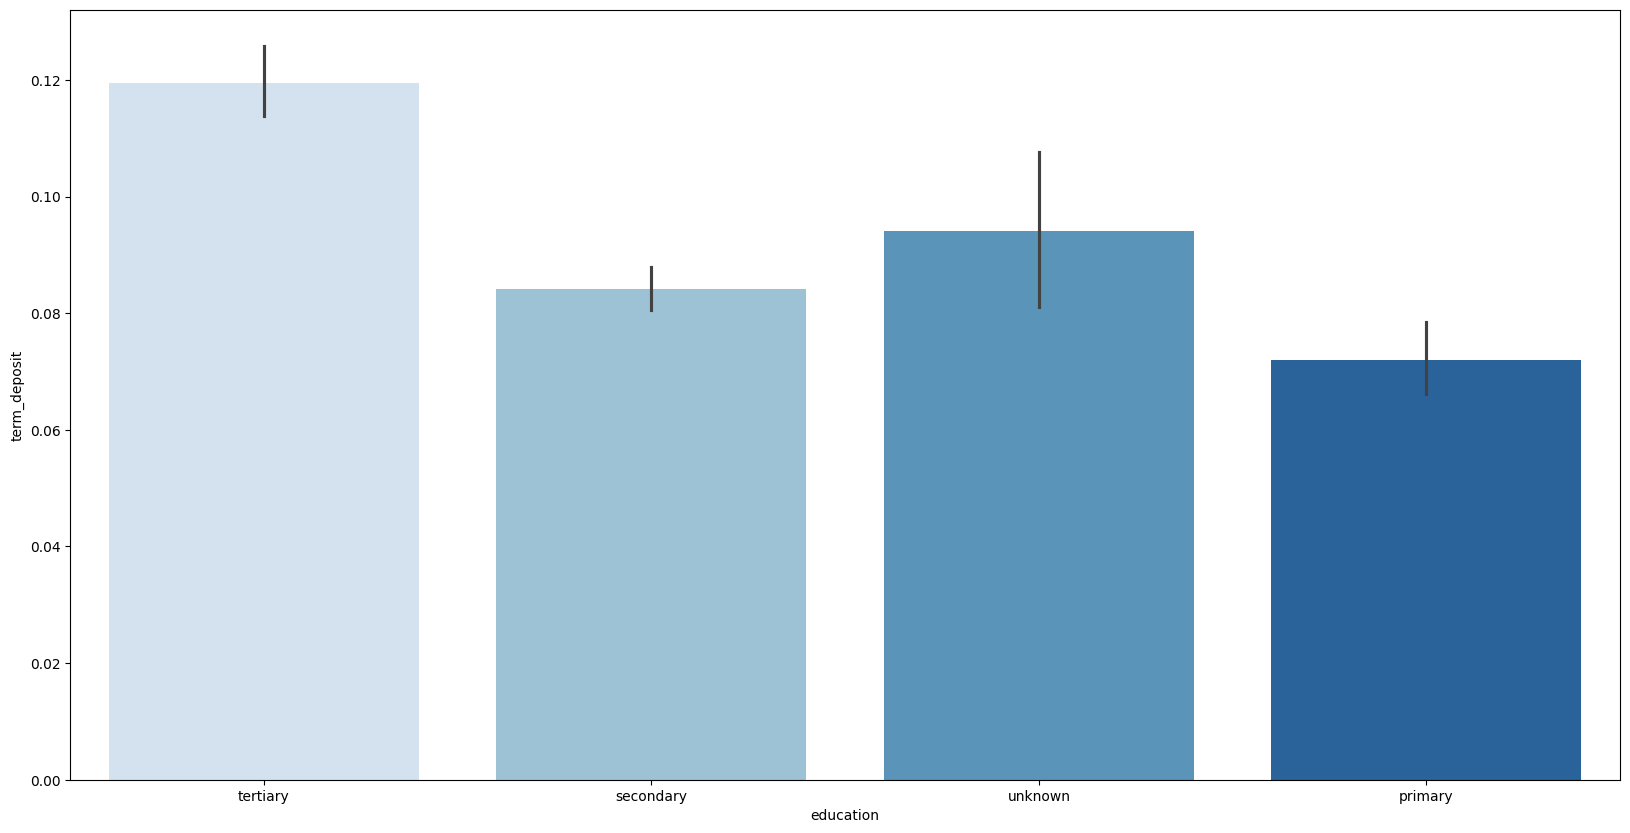

In [200]:
print(df['education'].value_counts())

fig = plt.figure(figsize=(20,10))
ax = sns.barplot(x=df['education'], y=df['term_deposit'], palette='Blues', hue=df['education'])

In [153]:
## Dữ liệu dạng danh mục có thứ bậc - education
educations = {
    'unknown': (1+2+3)/3,
    'primary': 1,
    'secondary': 2,
    'tertiary': 3
}

df['education'] = df['education'].map(educations).astype(int)
df['education'].value_counts()

education
2    23756
3    12302
1     6581
Name: count, dtype: int64

In [135]:
df['month'].value_counts()

month
may    13532
jul     6587
aug     5987
jun     5128
nov     3895
apr     2718
feb     2296
jan     1224
oct      518
sep      282
mar      258
dec      214
Name: count, dtype: int64

In [154]:
## Dữ liệu dạng danh mục có thứ bậc - month
months = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may':5,
    'jun':6,
    'jul':7,
    'aug':8,
    'sep':9,
    'oct':10,
    'nov':11,
    'dec':12
}
 
df['month'] = df['month'].map(months).astype(int)
df['month'].value_counts()

month
5     13532
7      6587
8      5987
6      5128
11     3895
4      2718
2      2296
1      1224
10      518
9       282
3       258
12      214
Name: count, dtype: int64

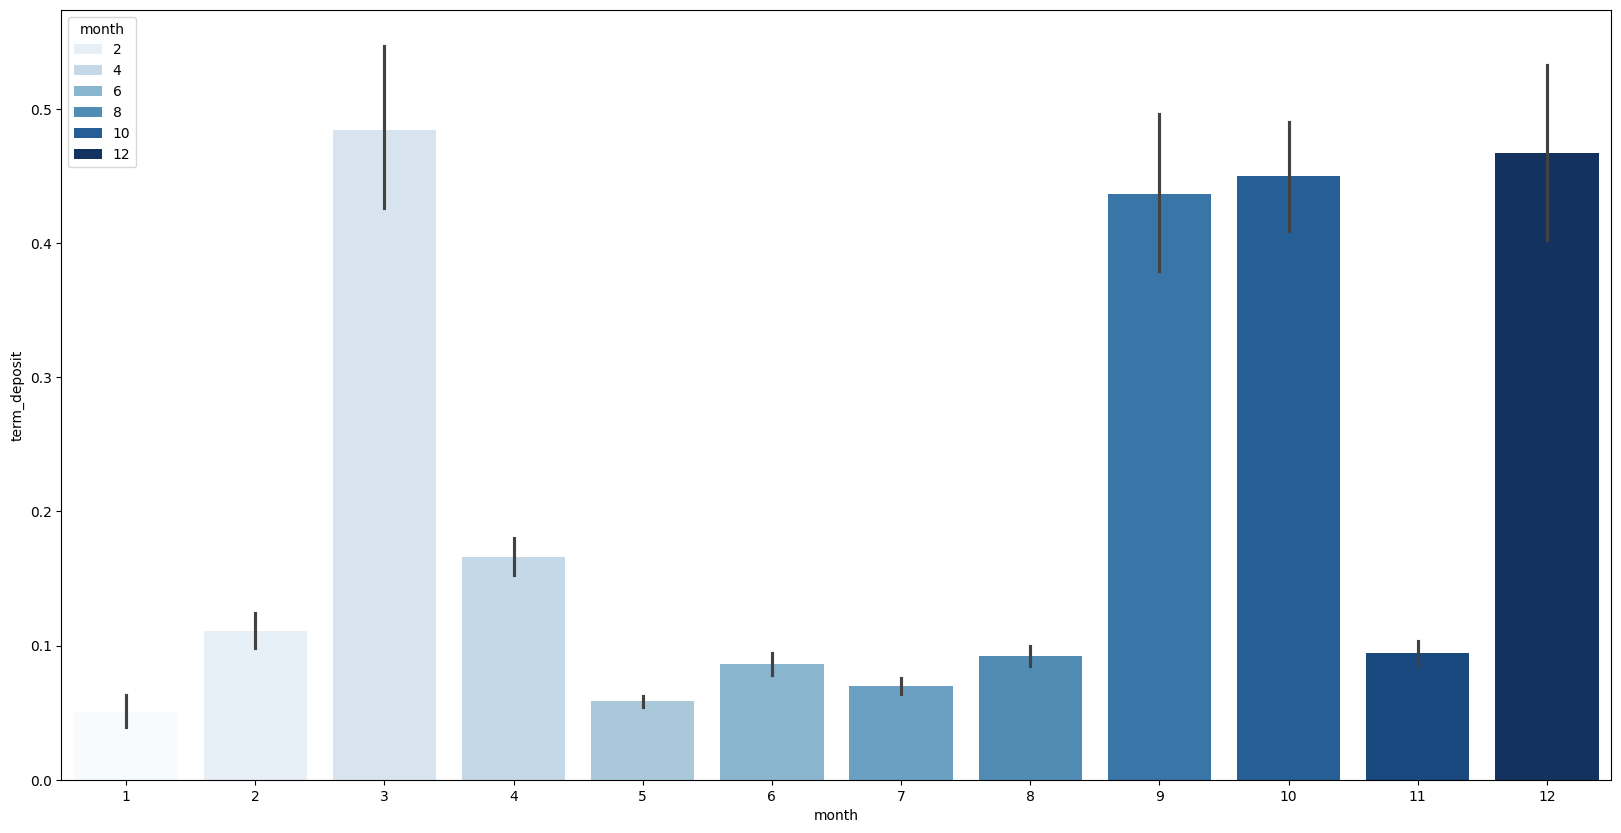

In [203]:
fig = plt.figure(figsize=(20,10))
ax = sns.barplot(x=df['month'], y=df['term_deposit'], palette='Blues', hue=df['month'])

### Bước 2: Tích hợp dữ liệu

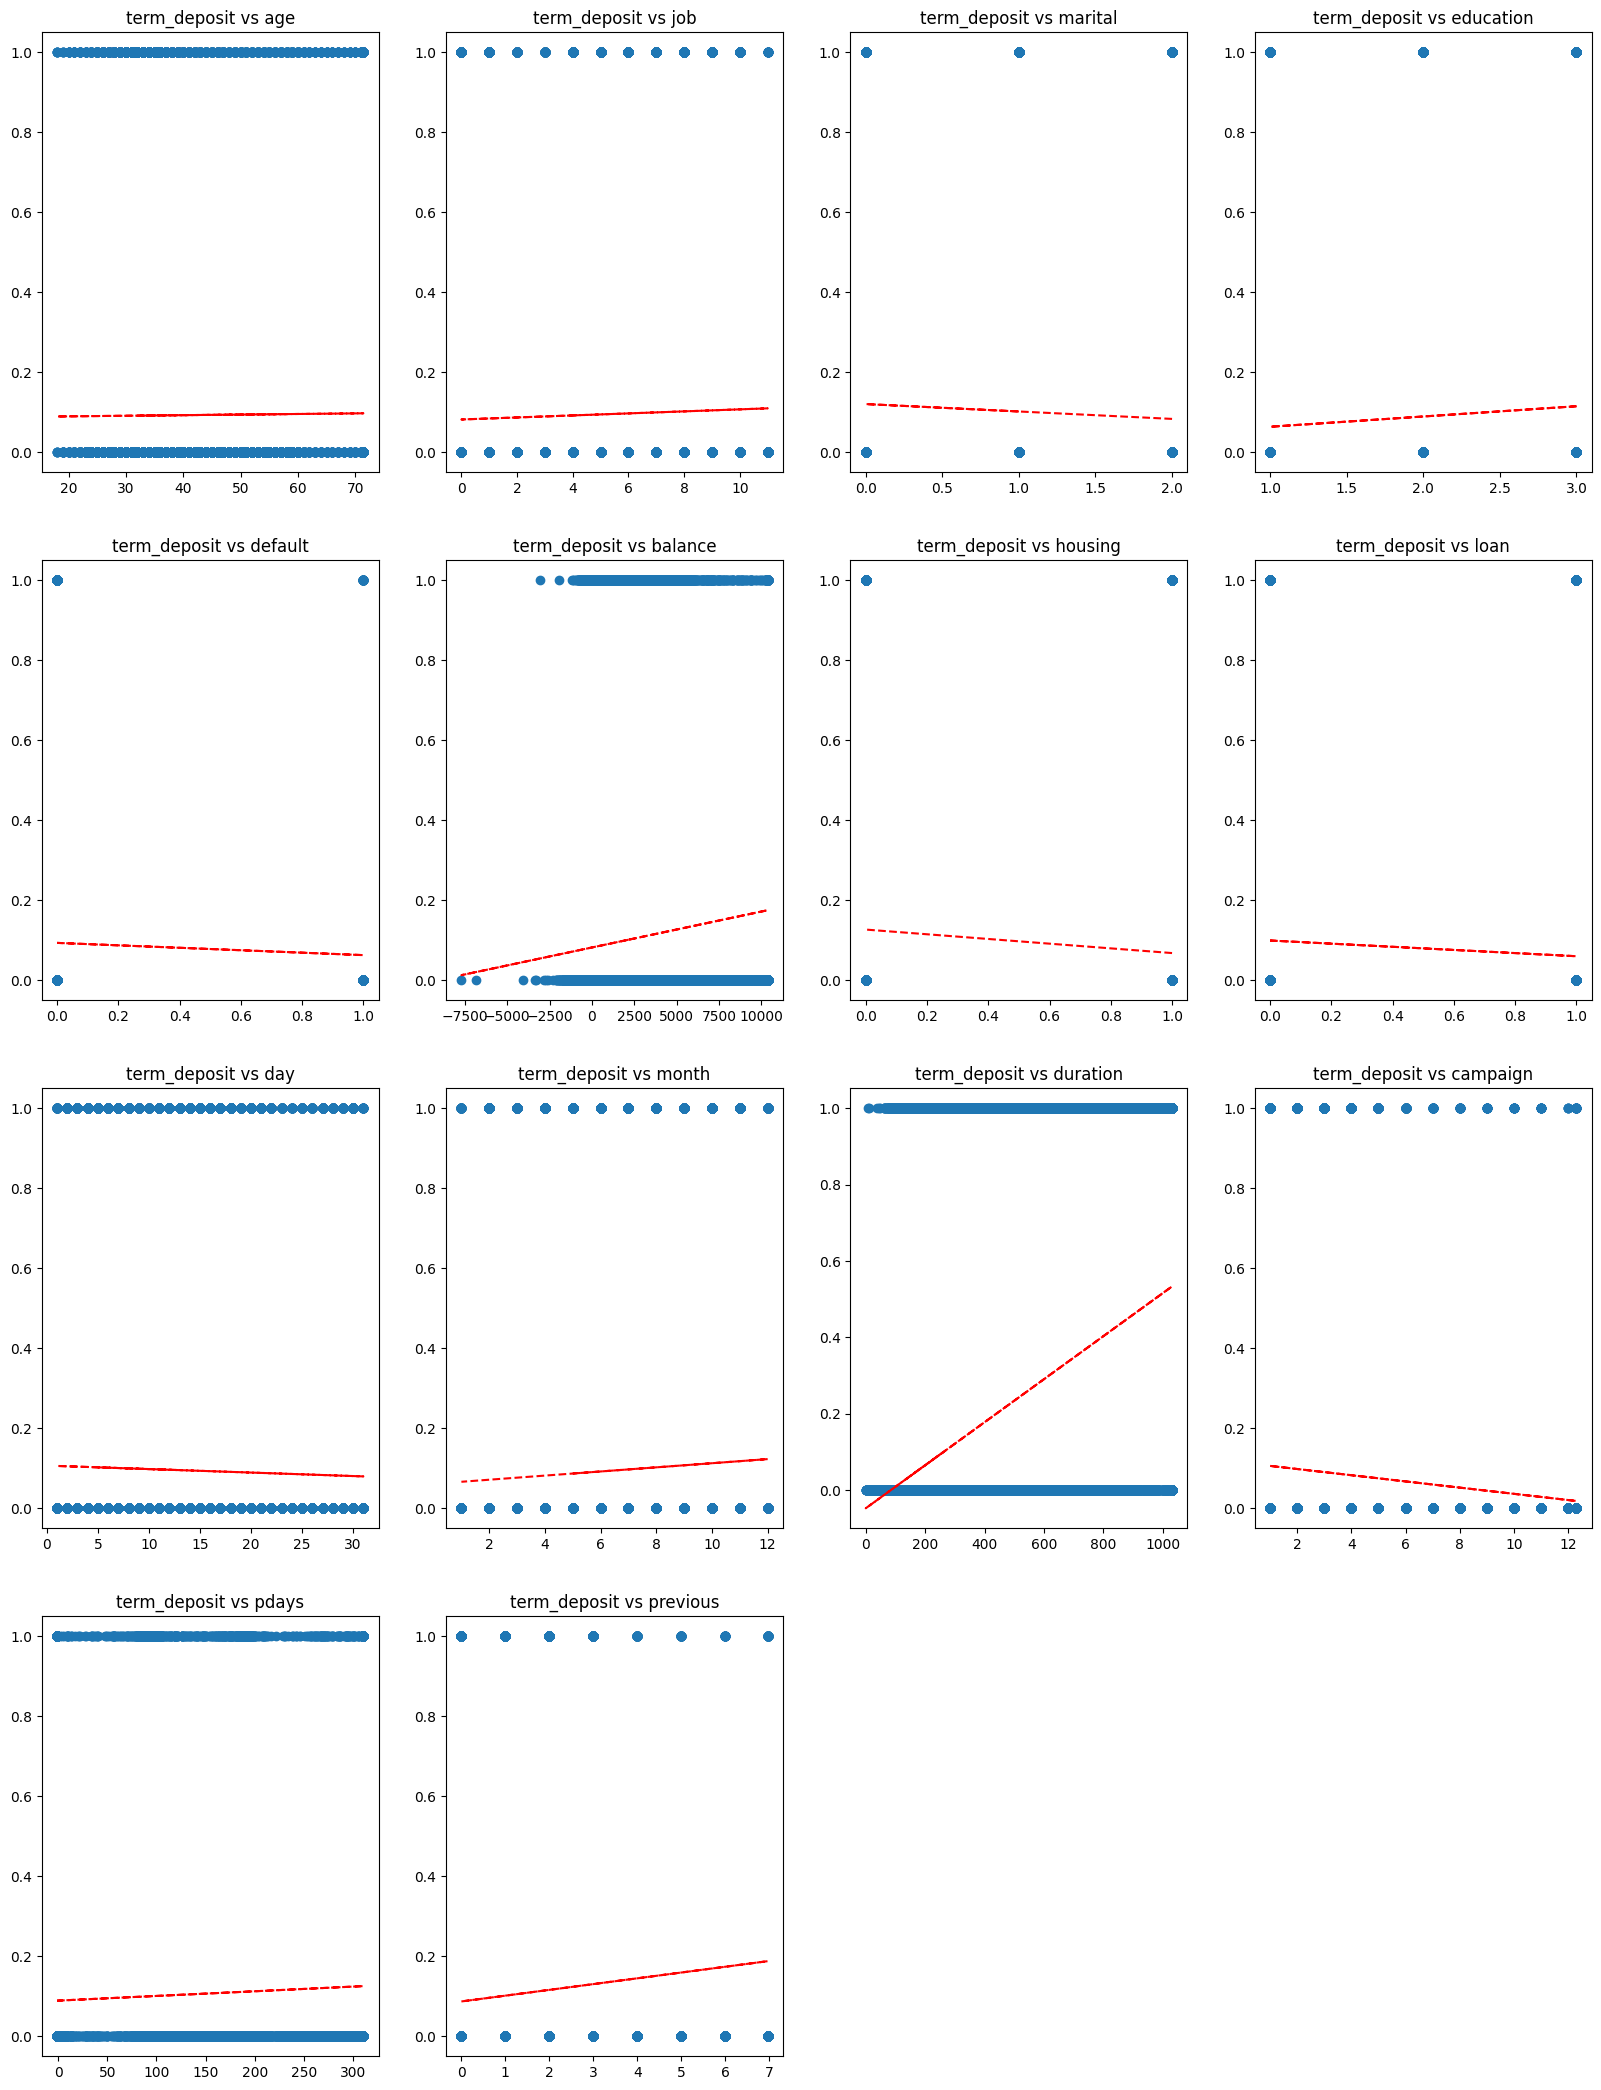

In [155]:
# Vẽ biểu đồ Scatter thể hiện mức tương quan giữa term_deposite với
# các thuộc tính độc lập khác

plt.figure(figsize=(20,40))

for i, col in enumerate(df.iloc[:,:-1].columns):
    plt.subplot(6,4,i+1)
    x = df[col]
    y= df['term_deposit']
    z = np.polyfit(x,y,1)
    p = np.poly1d(z)
    plt.scatter(x,y)
    plt.title("term_deposit vs " + col)
    plt.plot(x, p(x), 'r--')
    i+=1


### Bước 3: Biến đổi và thu giảm chiều dữ liệu

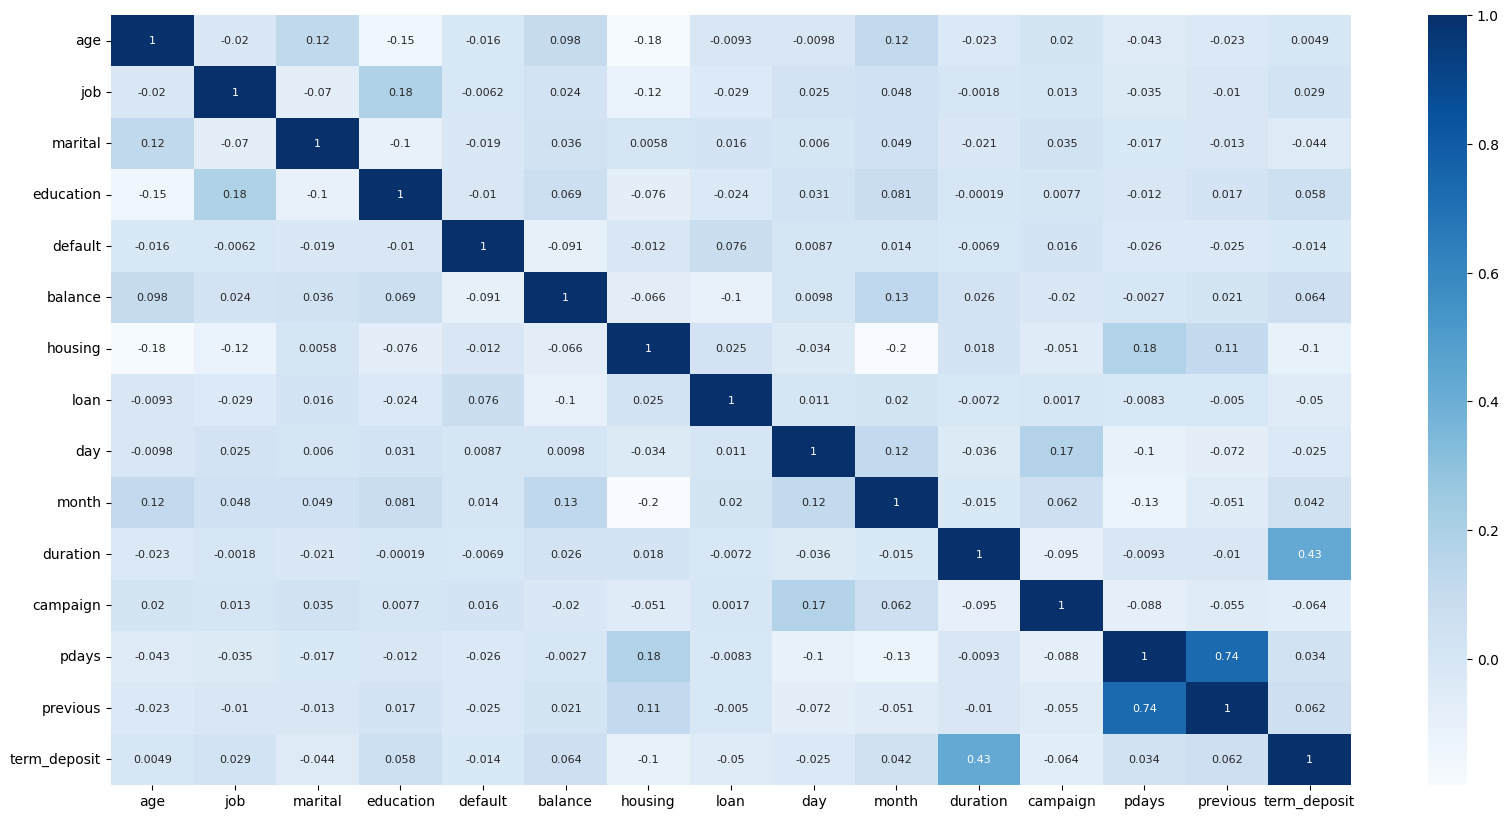

In [204]:
fig = plt.figure(figsize=(20,10))
ax = sns.heatmap(df.corr(),
                annot=True, annot_kws={"size": 8}, cmap="Blues")

In [205]:
def col_with_high_corr(df, threshold):
    col_corr = set()
    corr_matrix = df.corr()

    for i in range(len(corr_matrix.index)):
        for j in range(i):
            if np.abs(corr_matrix.iloc[i,j]) > threshold:
                col_name = corr_matrix.index[i]
                col_corr.add(col_name)
    return col_corr

     

In [206]:
columns_to_remove = col_with_high_corr(df, 0.7)

df.drop(columns_to_remove, axis=1, inplace=True)

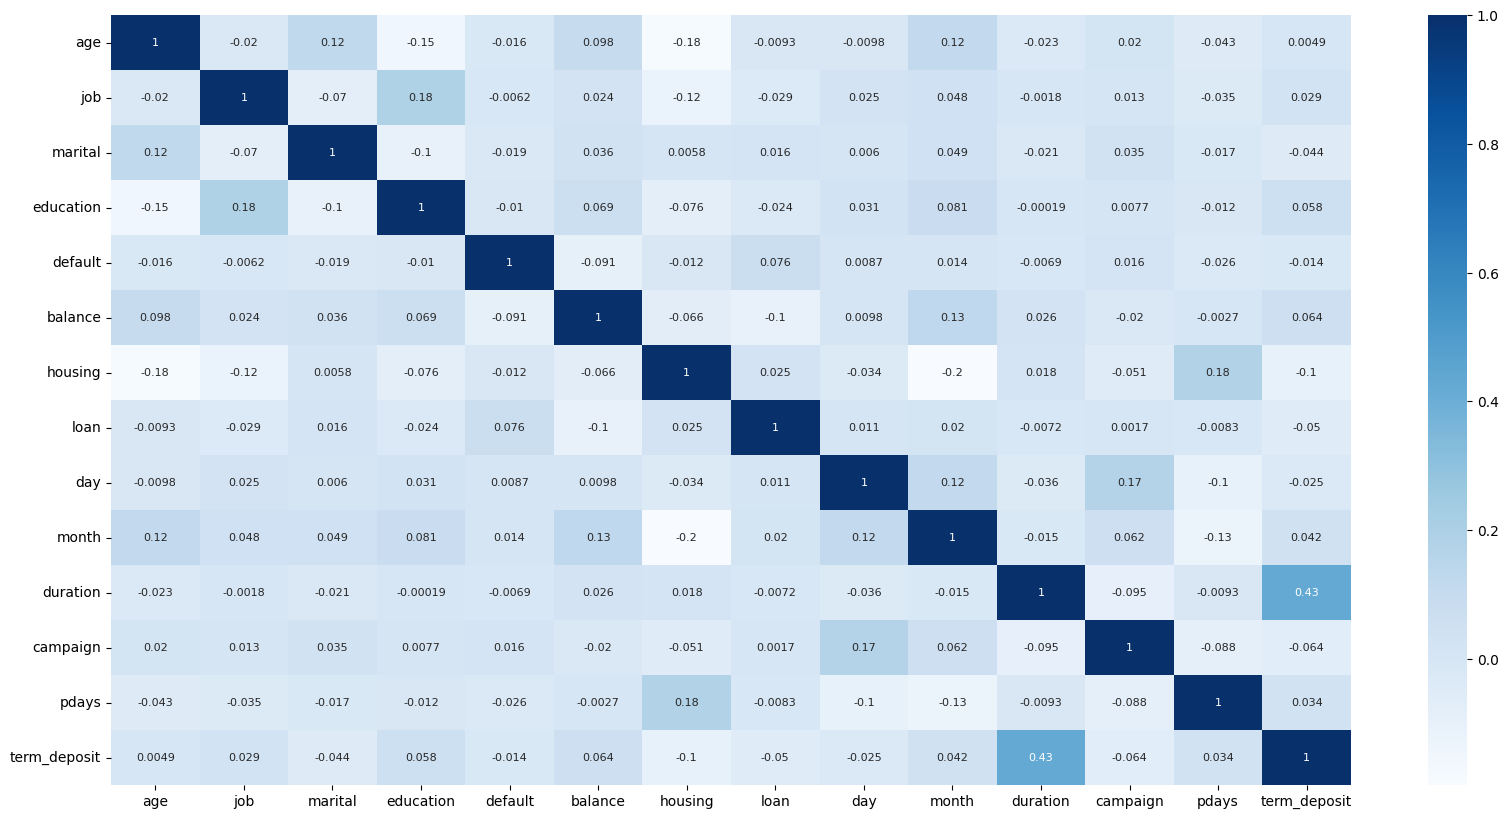

In [207]:
fig = plt.figure(figsize=(20,10))
ax = sns.heatmap(df.corr(),
                annot=True, annot_kws={"size": 8}, cmap="Blues")

### Bước 4: Chuẩn hóa dữ liệu

In [101]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,42639.0,40.750088,10.065950,18.000000,33.0,39.0,48.0,71.000000
job,42639.0,4.305823,3.277115,0.000000,1.0,4.0,7.0,11.000000
marital,42639.0,1.490232,0.694839,0.000000,1.0,2.0,2.0,2.000000
education,42639.0,2.134173,0.651817,1.000000,2.0,2.0,3.0,3.000000
default,42639.0,0.019020,0.136597,0.000000,0.0,0.0,0.0,1.000000
balance,42639.0,1209.884683,2065.805627,-7702.749076,62.0,429.0,1381.5,10366.476977
housing,42639.0,0.576702,0.494088,0.000000,0.0,1.0,1.0,1.000000
loan,42639.0,0.166162,0.372231,0.000000,0.0,0.0,0.0,1.000000
day,42639.0,15.854781,8.293901,1.000000,8.0,16.0,21.0,31.000000
month,42639.0,6.168672,2.368988,1.000000,5.0,6.0,8.0,12.000000


In [208]:
def rescale_to_minus_one_one(data):
    min_val = np.min(data)
    max_val = np.max(data)

    return (data*2 - min_val - max_val) / (max_val - min_val)
    

In [209]:
cols_to_rescale = ['balance', 'duration']

for col in cols_to_rescale:
    df[col] = rescale_to_minus_one_one(df[col])



In [167]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,42639.0,40.750088,10.065950,18.0,33.000000,39.000000,48.000000,71.0
job,42639.0,4.305823,3.277115,0.0,1.000000,4.000000,7.000000,11.0
marital,42639.0,1.490232,0.694839,0.0,1.000000,2.000000,2.000000,2.0
education,42639.0,2.134173,0.651817,1.0,2.000000,2.000000,3.000000,3.0
default,42639.0,0.019020,0.136597,0.0,0.000000,0.000000,0.000000,1.0
balance,42639.0,-0.013501,0.228655,-1.0,-0.140555,-0.099934,0.005494,1.0
housing,42639.0,0.576702,0.494088,0.0,0.000000,1.000000,1.000000,1.0
loan,42639.0,0.166162,0.372231,0.0,0.000000,0.000000,0.000000,1.0
day,42639.0,15.854781,8.293901,1.0,8.000000,16.000000,21.000000,31.0
month,42639.0,6.168672,2.368988,1.0,5.000000,6.000000,8.000000,12.0


### Bước 5: Rời rạc hóa dữ liệu

In [159]:
# Chia month thành 4 khoảng (interval) tương ứng với 4 quý trong năm
def month_to_quarter(month):
    if month < 4: 
        return 1
    elif month < 7:
        return 2
    elif month < 10:
        return 3
    else:
        return 4

df['month'] = df['month'].apply(month_to_quarter)
df['month'].value_counts()

month
2    21378
3    12856
4     4627
1     3778
Name: count, dtype: int64

In [211]:
# Chia age thành 5 khoảng tuổi có tần suất hiện cao nhất
age_intervals = pd.qcut(df['age'], q=5).value_counts()
age_intervals

age
(17.999, 32.0]    10324
(50.0, 71.0]       8457
(42.0, 50.0]       8415
(36.0, 42.0]       8226
(32.0, 36.0]       7217
Name: count, dtype: int64

In [160]:
def age_to_interval(age):
    if age <= 32: 
        return 1
    elif age <= 36:
        return 2
    elif age <= 42:
        return 3
    elif age <= 50:
        return 4
    else:
        return 5

df['age'] = df['age'].apply(age_to_interval)
df['age'].value_counts()

age
1    10324
5     8457
4     8415
3     8226
2     7217
Name: count, dtype: int64

In [223]:
df.to_csv('BankCustomerData_Preprocessed.csv', index=0)

### Bước 6: Train & Test Split

In [6]:
new_df = pd.read_csv('BankCustomerData_Preprocessed.csv')
new_df

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,term_deposit
0,5,4,2,3,0,0.089781,1,0,5,2,-0.493716,1,-1,0
1,4,9,1,2,0,-0.144208,1,0,5,2,-0.707092,1,-1,0
2,2,2,2,2,0,-0.147197,1,1,5,2,-0.852576,1,-1,0
3,4,1,2,2,0,0.019274,1,0,5,2,-0.821540,1,-1,0
4,2,11,1,2,0,-0.147307,0,0,5,2,-0.615922,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42634,1,8,1,2,0,0.127967,0,0,12,1,0.282198,2,92,1
42635,5,5,2,1,0,0.094983,0,0,12,1,-0.006830,2,-1,1
42636,2,1,2,1,0,0.596167,0,0,13,1,-0.460740,4,97,0
42637,1,8,1,2,0,-0.119304,0,0,13,1,-0.722611,2,-1,1


In [7]:
# Tách data thành 2 phần, 1 phần chứa dữ liệu thuộc tính, 1 phần chứa dữ liệu quyết định
X = np.asarray(new_df.iloc[:,:-1])
y = np.asarray(new_df['term_deposit'])

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
print(X_train.shape, X_test.shape)

(34111, 13) (8528, 13)


In [10]:
print(y_train.shape, y_test.shape)

(34111,) (8528,)


# Các giải thuật khai thác dữ liệu

## 5. Giải thuật K-Nearest Neighbor

### 5.1 Code tay

In [52]:
def distance(a, b):
    # Tính khoảng cách euclidean giữa 2 điểm
    return np.sqrt(np.sum((a-b)**2))


# Với k là số điểm  dữ liệu xét gần nhất
def knn(point, k):
    # Khoảng cách từ điểm xét đến toàn bộ dữ liệu train
    distances = [distance(point, x) for x in X_train]

    # Tìm ra k điểm gần nhất
    indices = np.argsort(distances)[:k]

    # Lấy ra nhãn của k điểm tìm thấy
    labels = np.array([y_train[ind] for ind in indices])

    return np.bincount(labels).argmax()


# Với k là số điểm  dữ liệu xét gần nhất
def weight_knn(point, k):
    # Khoảng cách từ điểm xét đến toàn bộ dữ liệu train
    distances = [distance(point, x) for x in X_train]

    # Tìm ra k điểm gần nhất
    indices = np.argsort(distances)[:k]

    # Lấy ra nhãn của k điểm tìm thấy
    labels = np.array([y_train[ind] for ind in indices])

    # Tính trọng số: trọng số tỷ lệ nghịch với khoảng cách (1/distance)
    weights = np.array([1/(distance + 1e-5) for distance in distances[:k]])
    
    # Tính nhãn dự đoán bằng cách sử dụng trọng số
    unique_labels = np.unique(labels)
    weighted_votes = np.zeros(len(unique_labels))

    for i, label in enumerate(unique_labels):
        weighted_votes[i] = np.sum(weights[labels == label])

    predicted_label = unique_labels[np.argmax(weighted_votes)]
    
    return predicted_label

   


In [54]:
from sklearn.metrics import accuracy_score

y_pred_100 = [knn(x, k=10) for x in X_test[:100]]
y_pred_100_weight = [weight_knn(x, k=10) for x in X_test[:100]]


print("Accuracy of hand-code KNN: %.2f %%" %(100*accuracy_score(y_test[:100], y_pred_100)))
print("Accuracy of hand-code weight-KNN: %.2f %%" %(100*accuracy_score(y_test[:100], y_pred_100_weight)))

Accuracy of hand-code KNN: 95.00 %
Accuracy of hand-code weight-KNN: 95.00 %


### 5.2 Sử dụng thư viện

In [28]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score
import time

# KNN không trọng số
start_time = time.time()
clf = neighbors.KNeighborsClassifier(n_neighbors = 10, p = 2)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
end_time = time.time()


In [31]:
# KNN có trọng số
start_time_weight = time.time()
clf = neighbors.KNeighborsClassifier(n_neighbors = 10, p = 2, weights = 'distance')
clf.fit(X_train, y_train)
y_weight_pred_train = clf.predict(X_train)
y_weight_pred_test = clf.predict(X_test)
end_time_weight = time.time()

In [33]:
print("Accuracy of Train set KNN: %.2f %%" %(100*accuracy_score(y_train, y_pred_train)))
print("Accuracy of Test set KNN: %.2f %%" %(100*accuracy_score(y_test, y_pred_test)))
print("Running time of KNN: %.2f (s)" % (end_time - start_time))

print("Accuracy of Train set Weight KNN: %.2f %%" %(100*accuracy_score(y_train, y_weight_pred_train)))
print("Accuracy of Test set Weight KNN: %.2f %%" %(100*accuracy_score(y_test, y_weight_pred_test)))
print("Running time of Weight KNN: %.2f (s)" % (end_time_weight - start_time_weight))

Accuracy of Train set KNN: 90.83 %
Accuracy of Test set KNN: 90.72 %
Running time of KNN: 0.68 (s)
Accuracy of Train set Weight KNN: 100.00 %
Accuracy of Test set Weight KNN: 90.69 %
Running time of Weight KNN: 2.36 (s)


Classification Report: KNN: 
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      7728
           1       0.57      0.05      0.09       800

    accuracy                           0.91      8528
   macro avg       0.74      0.52      0.52      8528
weighted avg       0.88      0.91      0.87      8528

Classification Report Weight KNN: 
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7728
           1       0.52      0.10      0.16       800

    accuracy                           0.91      8528
   macro avg       0.72      0.54      0.56      8528
weighted avg       0.88      0.91      0.88      8528



Text(0, 0.5, 'True Label')

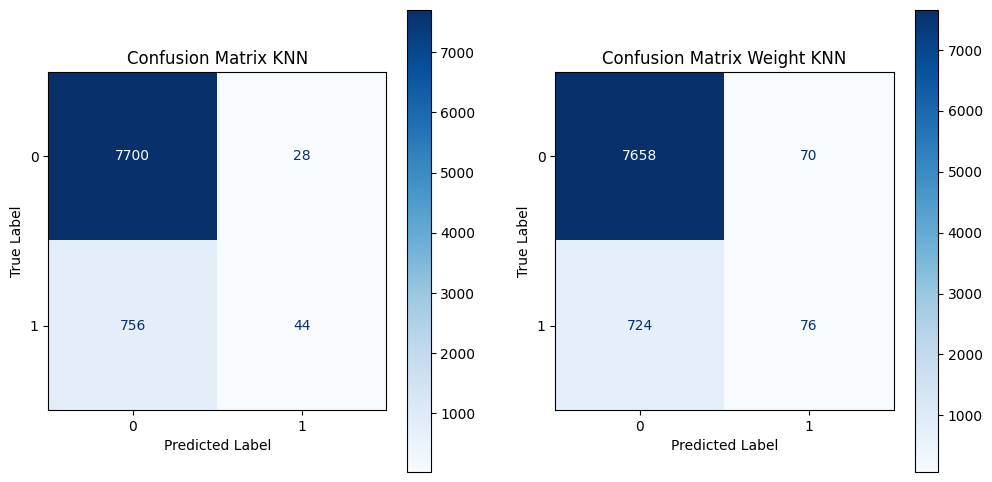

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

print("Classification Report: KNN: ")
print(classification_report(y_test, y_pred_test))
print("Classification Report Weight KNN: ")
print(classification_report(y_test, y_weight_pred))

cm1 = confusion_matrix(y_test, y_pred)
cm2 = confusion_matrix(y_test, y_weight_pred)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Vẽ confusion matrix đầu tiên
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot(cmap=plt.cm.Blues, ax=axes[0])
axes[0].set_title('Confusion Matrix KNN')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Vẽ confusion matrix thứ hai
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot(cmap=plt.cm.Blues, ax=axes[1])
axes[1].set_title('Confusion Matrix Weight KNN')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')


# 6. Giải thuật Perceptron Learning Algorithm

### 6.1 Code tay

In [12]:
def predict(w, x):
    # Trả về dấu của tích wT*x là nhãn dự đoán
    return np.sign(np.dot(w.T, x))


def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1] # Số điểm dữ liệu
    d = X.shape[0] # Số chiều dữ liệu
    eta = 1 # Learning rate
    misClassifications = 1 # Số điểm phân loại sai 
    minMisclassifications = 10000 # Khởi tạo số điểm phân loại sai tối thiểu
    iteration = 0

    # Pocket Algorithm
    while (misClassifications != 0 and (iteration<1000)):
        iteration+=1
        misClassifications = 0 
        # Trộn dữ liệu theo thứ tự nhẫu nhiên 
        mix_id = np.random.permutation(N)
        
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(d, 1)
            yi = y[mix_id[i]]
            if predict(w[-1], xi)[0] != yi: # Điểm phân lớp sai
                w_new = w[-1] + eta*yi*xi 
                w.append(w_new)
                misClassifications += 1
                
        if misClassifications<minMisclassifications:
            minMisclassifications = misClassifications
            
        print("Iteration {}, Misclassifications {}".format(iteration, misClassifications))
        
    return (w, minMisclassifications)
    

In [10]:
# Chuẩn bị dữ liệu để phù hợp với đầu vào của thuật toán
y_train_convert = np.array([-1 if y == 0 else 1 for y in y_train])
y_test_convert = np.array([-1 if y == 0 else 1 for y in y_test])

Xbar_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1).T
Xbar_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1).T

print("Train Label convert: ",np.unique(y_train_convert, return_counts=True))
print("Test Label convert: ",np.unique(y_test_convert, return_counts=True))
print("Train Input convert: ",Xbar_train.shape)
print("Test Input convert: ",Xbar_test.shape)

Train Label convert:  (array([-1,  1]), array([30950,  3161], dtype=int64))
Test Label convert:  (array([-1,  1]), array([7728,  800], dtype=int64))
Train Input convert:  (14, 34111)
Test Input convert:  (14, 8528)


In [13]:
import time
# Khởi tạo giá trị ban đầu cho w
np.random.seed(42)
w_init = np.random.rand(Xbar_train.shape[0], 1)

# Huấn luyện mô hình
start_time = time.time()
(w, minMisclassifications) = perceptron(Xbar_train, y_train_convert, w_init)
end_time = time.time()

print ("Minimum Misclassifications : ",minMisclassifications)
print('Updates weight is: ',w[-1].transpose())
print("Running time of PLA: %.2f (s)" % (end_time - start_time))

Iteration 1, Misclassifications 4720
Iteration 2, Misclassifications 4381
Iteration 3, Misclassifications 4499
Iteration 4, Misclassifications 4479
Iteration 5, Misclassifications 4408
Iteration 6, Misclassifications 4405
Iteration 7, Misclassifications 4425
Iteration 8, Misclassifications 4479
Iteration 9, Misclassifications 4443
Iteration 10, Misclassifications 4433
Iteration 11, Misclassifications 4409
Iteration 12, Misclassifications 4471
Iteration 13, Misclassifications 4424
Iteration 14, Misclassifications 4505
Iteration 15, Misclassifications 4446
Iteration 16, Misclassifications 4398
Iteration 17, Misclassifications 4418
Iteration 18, Misclassifications 4475
Iteration 19, Misclassifications 4445
Iteration 20, Misclassifications 4430
Iteration 21, Misclassifications 4451
Iteration 22, Misclassifications 4476
Iteration 23, Misclassifications 4426
Iteration 24, Misclassifications 4445
Iteration 25, Misclassifications 4372
Iteration 26, Misclassifications 4419
Iteration 27, Misclas

In [19]:
from sklearn.metrics import accuracy_score

y_pred_train = predict(w[-1], Xbar_train).reshape(-1)
y_pred_test = predict(w[-1], Xbar_test).reshape(-1)


print("Accuracy of train set PLA: %.2f %%" %(100*accuracy_score(y_train_convert, y_pred_train)))
print("Accuracy of test set PLA: %.2f %%" %(100*accuracy_score(y_test_convert, y_pred_test)))

Accuracy of train set PLA: 90.53 %
Accuracy of test set PLA: 90.64 %


### 6.2 Sử dụng thư viện

In [20]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import time

start_time = time.time()
clf = Perceptron(max_iter=1000, eta0=1)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
end_time = time.time()

In [21]:
print("Accuracy of train set PLA: %.2f %%" %(100*accuracy_score(y_train, y_pred_train)))
print("Accuracy of test set PLA: %.2f %%" %(100*accuracy_score(y_test, y_pred_test)))
print("Running time of PLA: %.2f (s)" % (end_time - start_time))

Accuracy of train set PLA: 90.83 %
Accuracy of test set PLA: 90.72 %
Running time of PLA: 0.05 (s)


Classification Report: Train set: 
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     30950
           1       0.56      0.05      0.08      3161

    accuracy                           0.91     34111
   macro avg       0.74      0.52      0.52     34111
weighted avg       0.88      0.91      0.87     34111

Classification Report: Test set: 
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      7728
           1       0.57      0.05      0.09       800

    accuracy                           0.91      8528
   macro avg       0.74      0.52      0.52      8528
weighted avg       0.88      0.91      0.87      8528



Text(0, 0.5, 'True Label')

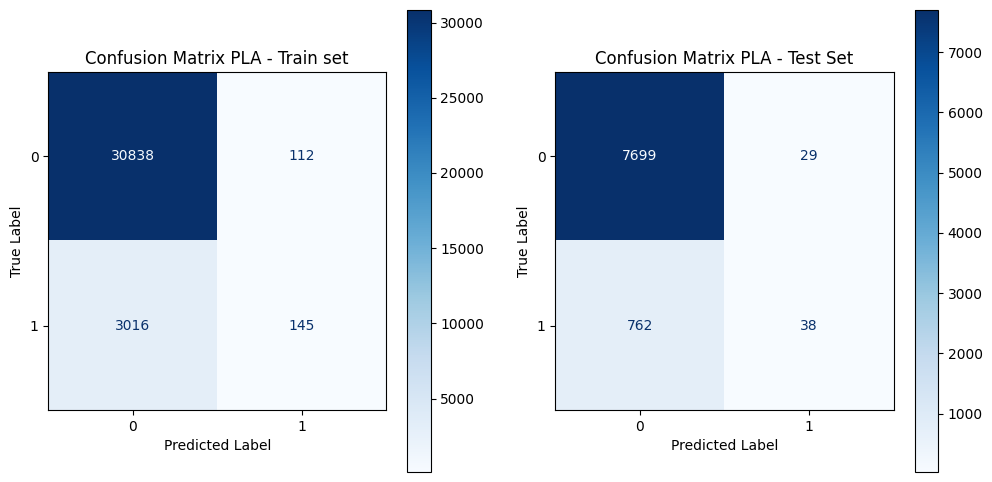

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

print("Classification Report: Train set: ")
print(classification_report(y_train, y_pred_train))
print("Classification Report: Test set: ")
print(classification_report(y_test, y_pred_test))

cm1 = confusion_matrix(y_train, y_pred_train)
cm2 = confusion_matrix(y_test, y_pred_test)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Vẽ confusion matrix cho Train set
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot(cmap=plt.cm.Blues, ax=axes[0])
axes[0].set_title('Confusion Matrix PLA - Train set')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Vẽ confusion matrix Test set
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot(cmap=plt.cm.Blues, ax=axes[1])
axes[1].set_title('Confusion Matrix PLA - Test Set')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

# ĐÁNH GIÁ CÁC THUẬT KHAI THÁC DỮ LIỆU

## 3. Đánh giá về thời gian chạy thuật toán

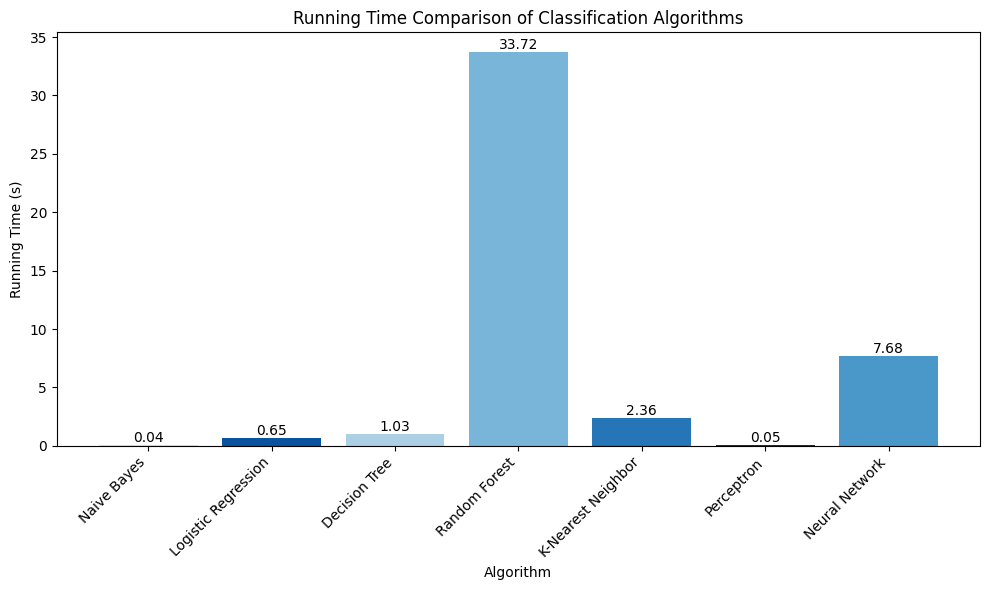

In [49]:
labels = ['Naive Bayes', 'Logistic Regression', 'Decision Tree', \
          'Random Forest', 'K-Nearest Neighbor', 'Perceptron', 'Neural Network']

values = [0.04, 0.65, 1.03, 33.72, 2.36, 0.05, 7.68]


colors = plt.cm.Blues(np.linspace(0.2, 1, len(values)))

# Sắp xếp màu theo giá trị (tùy chọn)
colors = [colors[i] for i in np.argsort(values)]

# Tạo biểu đồ cột
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=colors)

# Thiết lập tiêu đề và nhãn trục
plt.title('Running Time Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Running Time (s)')
plt.xticks(rotation=45, ha='right')

# Hiển thị giá trị trên đầu mỗi cột
for bar, value in zip(bars, values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{value}', ha='center', va='bottom')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

## 4. Đánh giá về độ chính xác tổng quát của thuật toán (Accuracy)

### 4.1 So sánh độ chính xác của tập huấn luyện

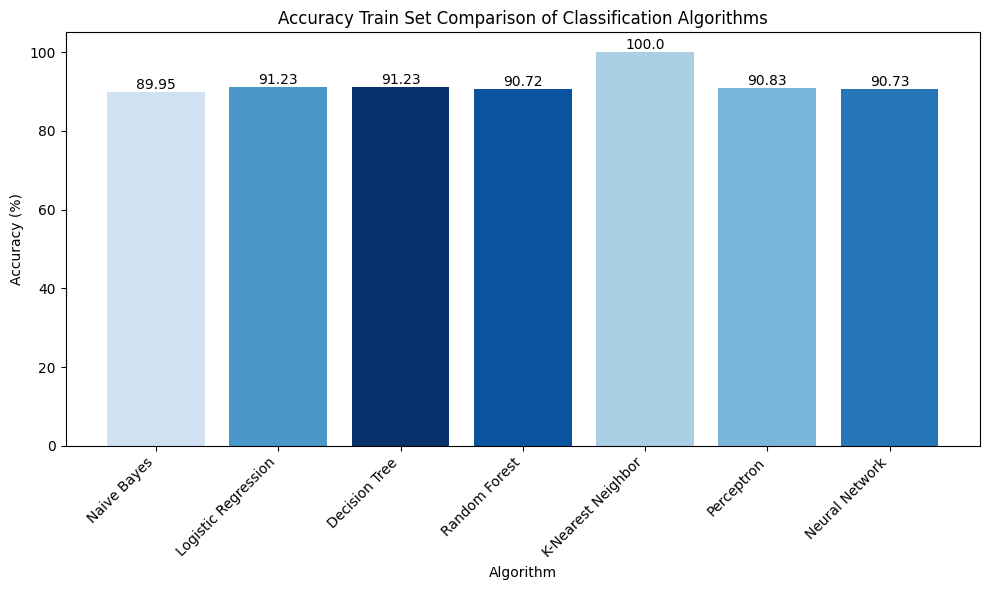

In [50]:
labels = ['Naive Bayes', 'Logistic Regression', 'Decision Tree', \
          'Random Forest', 'K-Nearest Neighbor', 'Perceptron', 'Neural Network']

values = [89.95, 91.23, 91.23, 90.72, 100.00, 90.83, 90.73]


colors = plt.cm.Blues(np.linspace(0.2, 1, len(values)))

# Sắp xếp màu theo giá trị (tùy chọn)
colors = [colors[i] for i in np.argsort(values)]

# Tạo biểu đồ cột
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=colors)

# Thiết lập tiêu đề và nhãn trục
plt.title('Accuracy Train Set Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45, ha='right')

# Hiển thị giá trị trên đầu mỗi cột
for bar, value in zip(bars, values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{value}', ha='center', va='bottom')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

### 4.2 So sánh độ chính xác của tập thử nghiệm

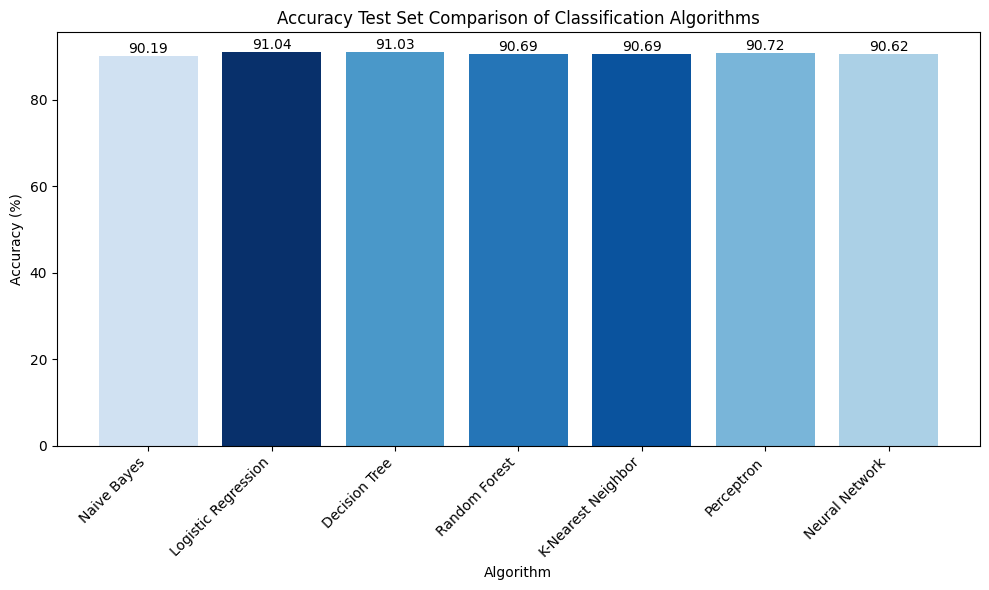

In [51]:
labels = ['Naive Bayes', 'Logistic Regression', 'Decision Tree', \
          'Random Forest', 'K-Nearest Neighbor', 'Perceptron', 'Neural Network']

values = [90.19, 91.04, 91.03, 90.69, 90.69, 90.72, 90.62]


colors = plt.cm.Blues(np.linspace(0.2, 1, len(values)))

# Sắp xếp màu theo giá trị (tùy chọn)
colors = [colors[i] for i in np.argsort(values)]

# Tạo biểu đồ cột
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=colors)

# Thiết lập tiêu đề và nhãn trục
plt.title('Accuracy Test Set Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45, ha='right')

# Hiển thị giá trị trên đầu mỗi cột
for bar, value in zip(bars, values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{value}', ha='center', va='bottom')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()